# Task.1=Titanic Survial Prediction

flow:
importing libraries->Data loading from csv-->processing data->exploring the data->training--> evaluate the data

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier

In [42]:
df=pd.read_csv('E:/Python/CODSOFT/titanic/tested.csv')

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
df.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [45]:
df.isnull().sum().sum()


414

In [46]:
df.dropna(inplace=True)

In [47]:
df=df.drop('Cabin',axis=1)

In [48]:
df.shape


(87, 11)

In [49]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,0.505747,1.137931,39.247126,0.597701,0.482759,98.109198
std,126.751901,0.502865,0.435954,15.218730,0.637214,0.860801,88.177319
min,904.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,986.000000,0.000000,1.000000,27.000000,0.000000,0.000000,35.339600
50%,1094.000000,1.000000,1.000000,39.000000,1.000000,0.000000,71.283300
75%,1216.000000,1.000000,1.000000,50.000000,1.000000,1.000000,135.066650
max,1306.000000,1.000000,3.000000,76.000000,3.000000,4.000000,512.329200


In [50]:
df['Survived'].value_counts()

1    44
0    43
Name: Survived, dtype: int64

C:\Users\ronak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    44
0    43
Name: Survived, dtype: int64

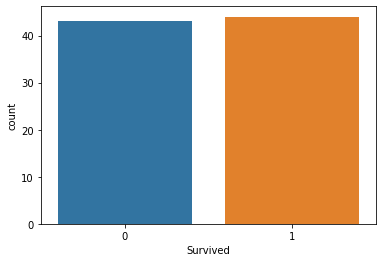

In [51]:
sns.countplot('Survived',data=df)
df['Survived'].value_counts()

In [52]:
df['Embarked'].value_counts()

C    47
S    39
Q     1
Name: Embarked, dtype: int64

In [53]:
df['Sex'].value_counts()

female    44
male      43
Name: Sex, dtype: int64

In [54]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [55]:
# Separating features and Target

X=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=df['Survived']

In [56]:
print(X)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
12        1    1  23.0      1      0   82.2667         0
14        1    1  47.0      1      0   61.1750         0
24        1    1  48.0      1      3  262.3750         1
26        1    1  22.0      0      1   61.9792         1
28        1    0  41.0      0      0   30.5000         0
..      ...  ...   ...    ...    ...       ...       ...
404       1    0  43.0      1      0   27.7208         1
405       2    0  20.0      0      0   13.8625         1
407       1    0  50.0      1      1  211.5000         1
411       1    1  37.0      1      0   90.0000         2
414       1    1  39.0      0      0  108.9000         1

[87 rows x 7 columns]


In [57]:
print(Y)

12     1
14     1
24     1
26     1
28     0
      ..
404    0
405    0
407    0
411    1
414    1
Name: Survived, Length: 87, dtype: int64


In [58]:
#training and testing the data

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [59]:
print(X.shape,X_train.shape,X_test.shape)

(87, 7) (69, 7) (18, 7)


In [60]:
model=LogisticRegression()

In [61]:

model.fit( X_train, Y_train)

C:\Users\ronak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Accuracy of the data

In [63]:
X_train_prediction=model.predict(X_train)

In [67]:
print(X_train_prediction)

[1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0
 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1]


In [68]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

print('Accuracy score of training data :', training_data_accuracy )

Accuracy score of training data : 1.0


In [69]:
#accuracy on test data

X_test_prediction=model.predict(X_test)

In [70]:
print(X_test_prediction)

[1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1]


In [79]:
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)
report=classification_report(Y_test,X_test_prediction)

print("Accuracy: {:.2f}%".format(testing_data_accuracy * 100))
print("Classification Report:\n", report)

Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

